In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df['Embarked'].mode()

0    S
dtype: object

In [25]:
df['Embarked'].fillna('S', inplace=True)

In [27]:
df.replace({'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)

In [46]:
df.replace({'Sex': {'male':0, 'female':1}}, inplace=True)

In [47]:
df2 = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [49]:
df1_notnull = df2[df2['Age'].isnull()==False]
df2_null = df2[df2['Age'].isnull()]

In [73]:
df2_null.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [50]:
df1_data = df1_notnull.drop(columns='Age')
df1_label = df1_notnull['Age']

In [55]:
df2_data = df2_null.drop(columns='Age')

In [56]:
clf = RFR(n_jobs=1)
clf.fit(df1_data, df1_label)

RandomForestRegressor(n_jobs=1)

In [57]:
pred = clf.predict(df2_data)
pred

array([24.51900974, 31.74768959, 15.64444444, 32.74075667, 21.34816667,
       27.89587295, 37.60333333, 26.04452305, 24.80511923, 27.89587295,
       30.74399795, 33.558     , 26.04452305, 24.20166667, 43.61391667,
       38.50014286, 28.2534    , 27.89587295, 30.74399795, 21.67138889,
       30.74399795, 30.74399795, 27.89587295, 29.61232495, 29.89833333,
       30.74399795, 42.50599598, 21.32625   , 23.77      , 29.64608983,
       26.08454332,  9.90384524, 25.35      , 52.6415    ,  6.98844444,
       14.13938095, 32.6875    , 56.11      , 29.22      , 42.50599598,
       26.04452305,  9.90384524, 35.36527339, 27.89587295,  7.77308333,
       21.76346154, 16.25807143, 29.22      , 29.64608983, 35.98852381,
       42.50599598, 26.04452305, 42.51619048, 26.04452305, 35.17375762,
       55.29983333, 38.50014286, 40.8307619 , 26.04452305, 24.195     ,
       33.865     , 30.74399795, 29.19166667,  9.90384524, 22.835     ,
       32.25      , 27.89587295, 27.07      , 61.38533333, 32.74

In [62]:
pred.shape

(177,)

In [75]:
df_pred = pd.Series(pred, index=df2_null.index)

In [76]:
df_pred.count()

177

In [77]:
df_pred

5      24.519010
17     31.747690
19     15.644444
26     32.740757
28     21.348167
         ...    
859    24.805119
863    14.139381
868    25.790533
878    27.895873
888    16.310000
Length: 177, dtype: float64

In [79]:
df[df['Age'].fillna(df_pred).isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [80]:
df['Age'].fillna(df_pred, inplace=True)

In [82]:
data = df[['Pclass', 'Sex', 'Age', 'Fare']]
label = df['Survived']

In [84]:
max_depth = [1,2,5,10]
n_estimators = [1,10,20,50,100]
best_score = 0

for i in max_depth:
    for j in n_estimators:
        clf2 = RFC(max_depth = i, n_estimators = j)
        scores = cross_val_score(clf2, data, label, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_param = {'max_depth': i, 'n_estimators': j}

print(f"Best score is {score:.2f}")
print(f"Best parameters: {best_param}")

Best score is 0.83
Best parameters: {'max_depth': 10, 'n_estimators': 20}


In [85]:
train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3)
clf2.fit(train_d, train_l)
importances = clf2.feature_importances_
features = train_d.columns

In [87]:
idx = np.argsort(importances, axis=0)
idx

array([0, 3, 2, 1])

In [89]:
from matplotlib import pyplot as plt

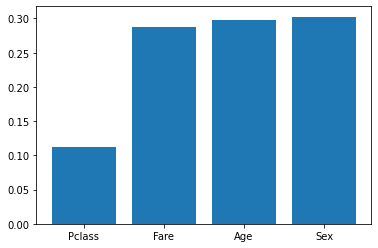

In [90]:
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), features[idx])
plt.show()

In [91]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.037936,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.068418,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.392339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.134466,0.114631,0.245489,0.182333,0.116569
Age,0.037936,-0.068418,-0.392339,-0.134466,1.000000,-0.318440,-0.215258,0.088654,0.008847
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.318440,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.215258,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.088654,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.008847,-0.059961,-0.078665,0.062142,1.000000
